In [10]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import csv
import optunity

plt.rcParams['figure.figsize']=(21,16)
plt.rcParams['axes.linewidth'] = 3
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=18)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['ytick.major.pad'] = 15
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)

colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 8)]


params=np.array([-0.819,2.296])
theta = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9, 9/9])

num_pts = 5000#2000   # the number of points to generate
skip = 50    # the number of initial points of the Sobol sequence to skip
# generate Sobol sequence
x_sobol=np.zeros((num_pts, 40))
res = optunity.solvers.Sobol.i4_sobol_generate(40, num_pts, skip)

for i,j in enumerate(zip(*res)):
    x_sobol[:,i]=j
    
percent=0.15

delta_a=params[0]*percent*(1-2*x_sobol[:,0])
delta_b=params[1]*percent*(1-2*x_sobol[:,1])

Fraction111=0.6923+0.6*(1-2*x_sobol[:,8])
Fraction100=0.211+0.2*(1-2*x_sobol[:,9])
Fraction211=0.0439+0.04*(1-2*x_sobol[:,10])
Fraction110=0.0528+0.04*(1-2*x_sobol[:,11])

#3rd-order polynomials
def poly(a,b, theta):
    BE = a*theta + b*theta**2
    return BE

normalized_facet_fraction=np.zeros((num_pts,4))
for k in range(num_pts):
    facet_fraction=[Fraction111[k],Fraction100[k],Fraction211[k],Fraction110[k]]
    normalized_facet_fraction[k,:] = facet_fraction/np.sum(facet_fraction)


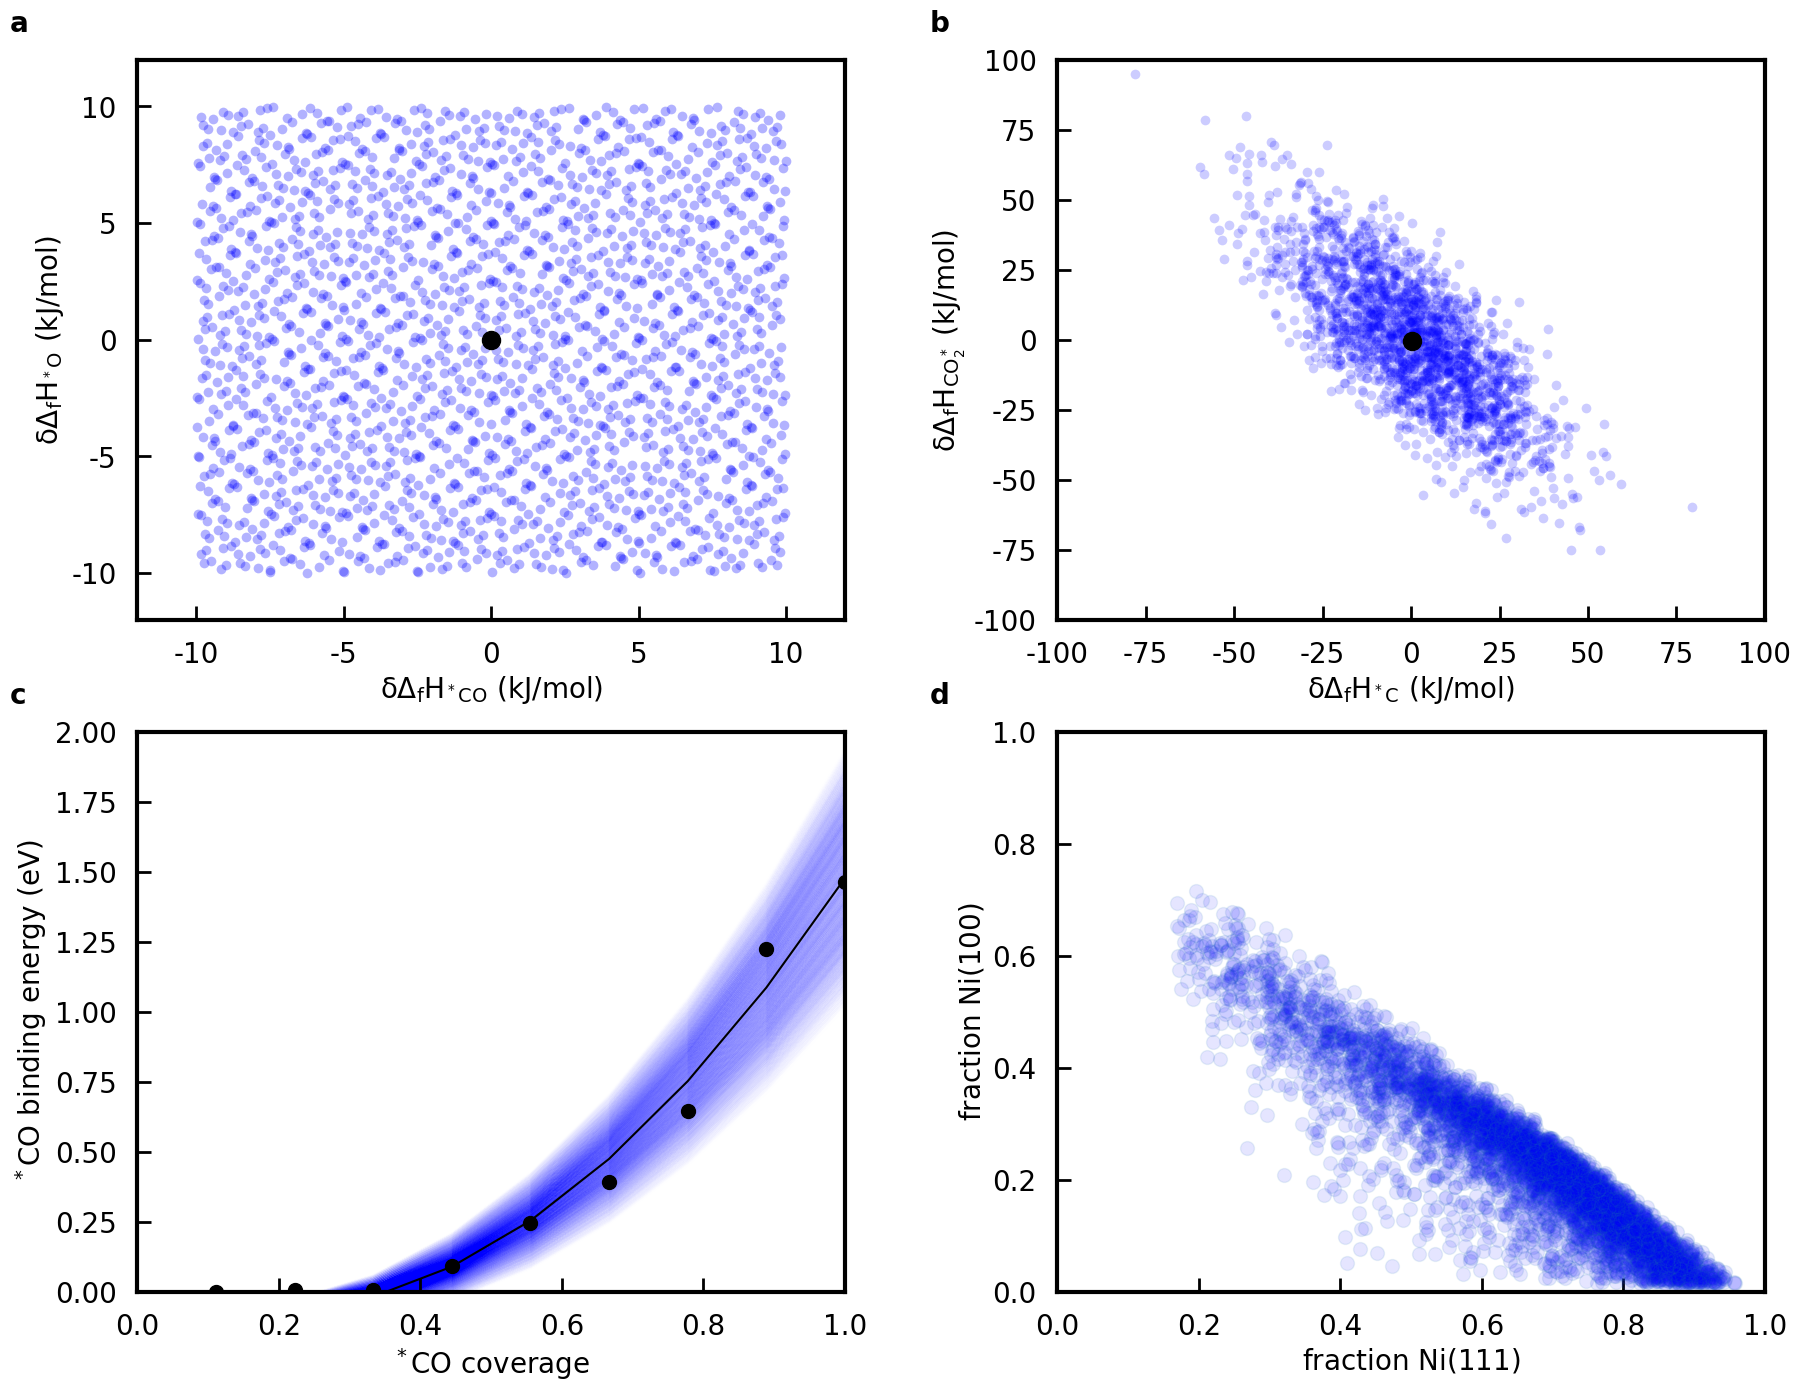

In [12]:
gs=gridspec.GridSpec(nrows=2, ncols=2)
gs.update(wspace=0.3, hspace=0.2)

ax0=plt.subplot(gs[0,0])
ax1=plt.subplot(gs[0,1])
ax2=plt.subplot(gs[1,0])
ax3=plt.subplot(gs[1,1])

rel_dir='DFT/ensembles/Ni111/'
file='_bee.txt'
fname1=rel_dir + str('XCO_19') +file
fname2=rel_dir + str('XO_19') +file
data_spcs1=pd.read_csv(fname1, sep="\t", header=0)
data_spcs2=pd.read_csv(fname2, sep="\t", header=0)

avg_spcs1=np.mean(data_spcs1.iloc[:,1])
avg_spcs2=np.mean(data_spcs2.iloc[:,1])
ax0.plot(avg_spcs1,avg_spcs2 ,  color='k', marker='o', linestyle='None', markersize=13,markeredgecolor='k',
              label='$\mathrm{mean}$')
ax0.plot(data_spcs1.iloc[:,1], data_spcs2.iloc[:,1],  marker='o', linestyle='None', markersize=7, 
              markerfacecolor='b',markeredgewidth=0, alpha=0.3, zorder=1)


ax0.set_ylabel('$\mathrm{\delta \Delta_f H _{^*O}\ (kJ/mol)}$')
ax0.set_ylim([-12, 12])
ax0.set_xlim([-12, 12])
ax0.set_xlabel('$\mathrm{\delta \Delta_f H _{^*CO}\ (kJ/mol)}$')

##BEEF ensembles

rel_dir='DFT/ensembles/Ni111/'
file='_bee.txt'
fname1=rel_dir + str('XC_19') +file
fname2=rel_dir + str('CO2X_19') +file
data_spcs1=pd.read_csv(fname1, sep="\t", header=0)
data_spcs2=pd.read_csv(fname2, sep="\t", header=0)

avg_spcs1=np.mean(data_spcs1.iloc[:,1])
avg_spcs2=np.mean(data_spcs2.iloc[:,1])
ax1.plot(avg_spcs1,avg_spcs2 ,  color='k', marker='o', linestyle='None', markersize=13,markeredgecolor='k',
              label='$\mathrm{mean}$')
ax1.plot(data_spcs1.iloc[:,1], data_spcs2.iloc[:,1],  marker='o', linestyle='None', markersize=7, 
              markerfacecolor='b',markeredgewidth=0, alpha=0.2, zorder=1)


ax1.set_ylabel('$\mathrm{\delta \Delta_f H _{CO_2^*}\ (kJ/mol)}$')
ax1.set_ylim([-100, 100])
ax1.set_xlim([-100, 100])
ax1.set_xlabel('$\mathrm{\delta \Delta_f H _{^*C}\ (kJ/mol)}$')

theta_co_111 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9, 9/9])
hcov_co_111=(np.array([-1.587,-1.581,-1.58,-1.495,-1.343,-1.194,-0.9415,-0.3616,-0.1236])--1.587)

for i in range(num_pts):
    ax2.plot(theta,poly(params[0]+delta_a[i],params[1]+delta_b[i],theta),color='b',alpha=0.002)

ax2.plot(theta,poly(params[0],params[1],theta),color='k')
ax2.plot(theta,hcov_co_111,linestyle='None',marker='o',color='k')
    
ax2.set_ylabel('$\mathrm{^*CO\ binding\ energy\ (eV)}$')
ax2.set_ylim([0, 2])
ax2.set_xlim([0, 1])
ax2.set_xlabel('$\mathrm{^*CO\ coverage}$')


ax3.plot(normalized_facet_fraction[:,0],normalized_facet_fraction[:,1],linestyle='None',marker='o',markerfacecolor='b',alpha=0.1)
#ax3.plot(normalized_facet_fraction[:,0],normalized_facet_fraction[:,2],linestyle='None',marker='o',markerfacecolor='g',alpha=0.1)
#ax3.plot(normalized_facet_fraction[:,0],normalized_facet_fraction[:,3],linestyle='None',marker='o',markerfacecolor='r',alpha=0.1)

ax3.set_ylabel('$\mathrm{fraction\ Ni(100)}$')
ax3.set_ylim([0, 1])
ax3.set_xlim([0, 1])
ax3.set_xlabel('$\mathrm{fraction\ Ni(111)}$')

import string 
ax0.text(-0.18, 1.05, string.ascii_lowercase[0], transform=ax0.transAxes, size=20, weight='bold')
ax1.text(-0.18, 1.05, string.ascii_lowercase[1], transform=ax1.transAxes, size=20, weight='bold')
ax2.text(-0.18, 1.05, string.ascii_lowercase[2], transform=ax2.transAxes, size=20, weight='bold')
ax3.text(-0.18, 1.05, string.ascii_lowercase[3], transform=ax3.transAxes, size=20, weight='bold')

plt.savefig('uq_method.png',dpi=400,bbox_inches='tight')

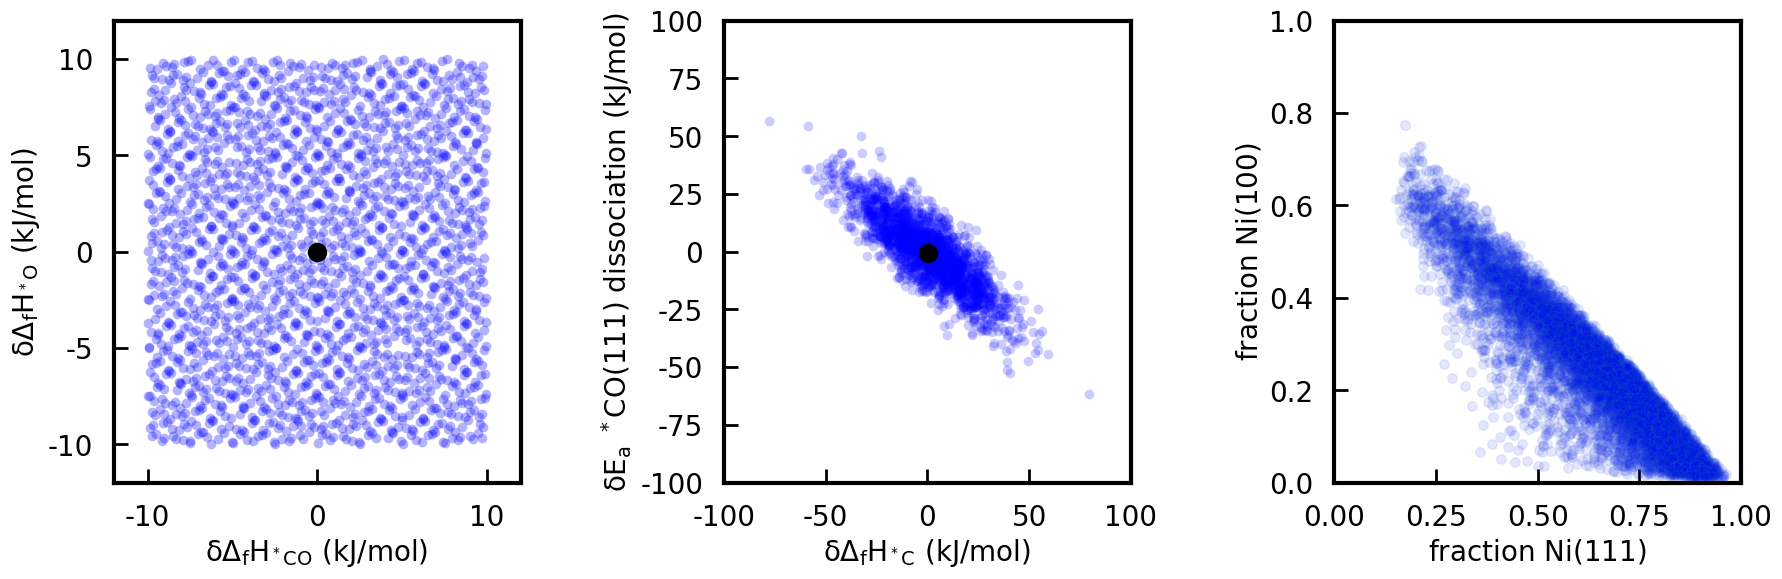

In [23]:
plt.rcParams['figure.figsize']=(21,6)
plt.rcParams['axes.linewidth'] = 3
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.rc('legend', fontsize=18)
plt.rcParams['lines.markersize'] = 7
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 15
plt.rcParams['ytick.major.pad'] = 15
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)

gs=gridspec.GridSpec(nrows=1, ncols=3)
gs.update(wspace=0.5, hspace=0.2)

ax0=plt.subplot(gs[0,0])
ax1=plt.subplot(gs[0,1])
ax2=plt.subplot(gs[0,2])

rel_dir='DFT/ensembles/Ni111/'
file='_bee.txt'
fname1=rel_dir + str('XCO_19') +file
fname2=rel_dir + str('XO_19') +file
data_spcs1=pd.read_csv(fname1, sep="\t", header=0)
data_spcs2=pd.read_csv(fname2, sep="\t", header=0)

avg_spcs1=np.mean(data_spcs1.iloc[:,1])
avg_spcs2=np.mean(data_spcs2.iloc[:,1])
ax0.plot(avg_spcs1,avg_spcs2 ,  color='k', marker='o', linestyle='None', markersize=13,markeredgecolor='k',
              label='$\mathrm{mean}$')
ax0.plot(data_spcs1.iloc[:,1], data_spcs2.iloc[:,1],  marker='o', linestyle='None', markersize=7, 
              markerfacecolor='b',markeredgewidth=0, alpha=0.3, zorder=1)


ax0.set_ylabel('$\mathrm{\delta \Delta_f H _{^*O}\ (kJ/mol)}$')
ax0.set_ylim([-12, 12])
ax0.set_xlim([-12, 12])
ax0.set_xlabel('$\mathrm{\delta \Delta_f H _{^*CO}\ (kJ/mol)}$')

##BEEF ensembles

rel_dir='DFT/ensembles/Ni111/'
file='_bee.txt'
fname1=rel_dir + str('XC_19') +file
fname2=rel_dir + str('C-O') +file
data_spcs1=pd.read_csv(fname1, sep="\t", header=0)
data_spcs2=pd.read_csv(fname2, sep="\t", header=0)

avg_spcs1=np.mean(data_spcs1.iloc[:,1])
avg_spcs2=np.mean(data_spcs2.iloc[:,1])
ax1.plot(avg_spcs1,avg_spcs2 ,  color='k', marker='o', linestyle='None', markersize=13,markeredgecolor='k',
              label='$\mathrm{mean}$')
ax1.plot(data_spcs1.iloc[:,1], data_spcs2.iloc[:,1],  marker='o', linestyle='None', markersize=7, 
              markerfacecolor='b',markeredgewidth=0, alpha=0.2, zorder=1)


ax1.set_ylabel('$\mathrm{\delta E_a\ ^*CO(111)\ dissociation\ (kJ/mol)}$')
ax1.set_ylim([-100, 100])
ax1.set_xlim([-100, 100])
ax1.set_xlabel('$\mathrm{\delta \Delta_f H _{^*C}\ (kJ/mol)}$')

# theta_co_111 = np.array([1/9, 2/9, 3/9, 4/9, 5/9, 6/9, 7/9, 8/9, 9/9])
# hcov_co_111=(np.array([-1.587,-1.581,-1.58,-1.495,-1.343,-1.194,-0.9415,-0.3616,-0.1236])--1.587)

# for i in range(num_pts):
#     ax2.plot(theta,poly(params[0]+delta_a[i],params[1]+delta_b[i],theta),color='b',alpha=0.01)

# ax2.plot(theta,poly(params[0],params[1],theta),color='k')
# ax2.plot(theta,hcov_co_111,linestyle='None',marker='o',color='k')
    
# ax2.set_ylabel('$\mathrm{^*CO\ binding\ energy\ (eV)}$')
# ax2.set_ylim([0, 2])
# ax2.set_xlim([0, 1])
# ax2.set_xlabel('$\mathrm{^*CO\ coverage}$')


ax2.plot(normalized_facet_fraction[:,0],normalized_facet_fraction[:,1],linestyle='None',marker='o',markerfacecolor='b',alpha=0.1)
#ax3.plot(normalized_facet_fraction[:,0],normalized_facet_fraction[:,2],linestyle='None',marker='o',markerfacecolor='g',alpha=0.1)
#ax3.plot(normalized_facet_fraction[:,0],normalized_facet_fraction[:,3],linestyle='None',marker='o',markerfacecolor='r',alpha=0.1)

ax2.set_ylabel('$\mathrm{fraction\ Ni(100)}$')
ax2.set_ylim([0, 1])
ax2.set_xlim([0, 1])
ax2.set_xlabel('$\mathrm{fraction\ Ni(111)}$')

plt.savefig('uq_method_lecture.png',dpi=600,bbox_inches='tight')

plt.show()